## Before Starting

<font color=orange> I don't have any experience with xarray, neither have ever heard of it. I am pretty familiar with pandas from academic and professional experience. Answers to questions in each section is separated by paragraph.</font>

## Introduction to multidimensional arrays

<font color=orange>Unlabelled, N-dimensional arrays of numbers are the most widely used data structure in scientific computing. Geoscientist use multidimensional arrays since they commonly used sets of climate variables(e.g. temperature and precipitation) that vary in space and time and are represented on a regularly-spaced grid.

The current challenges in working with N-dimensional arrays in this fashion is the fact that the data are almost disassociated from their metadata, such that users are sometimes unware of the meaning of each axis. Another challenge is the continuing growth of datasets that are limited by the computational power of each machine.</font>

## xarray architecture

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters

In [3]:
ds = xr.open_dataset('../football/data/jan-1979.nc').sortby('time') #OPEN THE DATASET

In [3]:
ds
#We can see that are 4 variables of 3 dimensions: longitude, latitude and time. Longitude and longittude is grows in steps of 
#0.75 degrees and time in steps of days.

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 249)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-02-01
Data variables:
    sst        (time, latitude, longitude) float32 271.4601 ... 273.1602
    u10        (time, latitude, longitude) float32 -5.9714546 ... 2.8588574
    v10        (time, latitude, longitude) float32 5.250738 ... -2.5136685
    t2m        (time, latitude, longitude) float32 240.33821 ... 242.45421
Attributes:
    Conventions:  CF-1.6
    history:      2019-04-30 15:44:30 GMT by grib_to_netcdf-2.12.0: grib_to_n...

In [4]:
temperature = ds['t2m']
print(temperature)
#It shows the temperature in Kelvins in each day from 3 in 3 hours and in different coordinates

<xarray.DataArray 't2m' (time: 249, latitude: 241, longitude: 480)>
array([[[240.33821, 240.33821, ..., 240.33821, 240.33821],
        [240.63002, 240.62001, ..., 240.6517 , 240.64001],
        ...,
        [257.21613, 257.21115, ..., 257.21115, 257.21448],
        [256.17065, 256.17065, ..., 256.17065, 256.17065]],

       [[240.73174, 240.73174, ..., 240.73174, 240.73174],
        [241.00519, 240.99686, ..., 241.02353, 241.01353],
        ...,
        [256.41742, 256.4124 , ..., 256.42078, 256.4191 ],
        [255.25522, 255.25522, ..., 255.25522, 255.25522]],

       ...,

       [[239.67957, 239.67957, ..., 239.67957, 239.67957],
        [240.74673, 240.73674, ..., 240.77008, 240.7584 ],
        ...,
        [243.70813, 243.6998 , ..., 243.7198 , 243.71313],
        [242.44254, 242.44254, ..., 242.44254, 242.44254]],

       [[239.9397 , 239.9397 , ..., 239.9397 , 239.9397 ],
        [241.04521, 241.03354, ..., 241.07022, 241.05855],
        ...,
        [243.49136, 243.48636, ...,

<font color=orange>Xarray library gives the ability of working with higher dimensional arrays and operations over named dimensions, whereas pandas operations are much more focus on dimensions < 3 and 

The main benefits of xarray is that dimensions can have names, which are much easir to track of than axis numbers. Another benefit is that xarray uses dimension names for indexing, aggregation and broadcasting. Finally, working with xarray can be much faster since most of the time Python do not actually read the data into memory, rather just scan the contents of the file. However, not reading directly into memory can be painful to observe special patterns located in the dataset.Another limitation explored by the Xarray library has few community open source projects since nearly all of its core developers are full-time mainstream scientists (potsdocs, research scientists, or professors), rather than professional software engineers.

The xarray architecture is basically formed by NetCDF and the two main data structures are DataArray and the Dataset. DataArray is xarray’s implementation of a labeled, multi-dimensional array. On the other hand, DataSet is xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.</font>

## label-based indexing

In [5]:
ds['t2m'][0, 0, 0]

<xarray.DataArray 't2m' ()>
array(240.33821, dtype=float32)
Coordinates:
    longitude  float32 0.0
    latitude   float32 90.0
    time       datetime64[ns] 1979-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [6]:
ds['t2m'].loc['1979-01-01T06:00:00', :, :]

<xarray.DataArray 't2m' (latitude: 241, longitude: 480)>
array([[241.86893, 241.86893, 241.86893, ..., 241.86893, 241.86893, 241.86893],
       [241.54712, 241.54045, 241.5321 , ..., 241.56212, 241.55545, 241.55212],
       [241.55212, 241.53877, 241.52377, ..., 241.5888 , 241.57713, 241.56378],
       ...,
       [257.01273, 256.99936, 256.98438, ..., 257.04773, 257.03604, 257.02438],
       [256.4141 , 256.40576, 256.40076, ..., 256.42078, 256.4191 , 256.41577],
       [255.22855, 255.22855, 255.22855, ..., 255.22855, 255.22855, 255.22855]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
    time       datetime64[ns] 1979-01-01T06:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [7]:
ds['t2m'].isel(time=0, latitude=0, longitude=0)

<xarray.DataArray 't2m' ()>
array(240.33821, dtype=float32)
Coordinates:
    longitude  float32 0.0
    latitude   float32 90.0
    time       datetime64[ns] 1979-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [8]:
ds['t2m'].sel(time='1979-01-01T06:00:00', latitude=75.0, longitude=180.0)

<xarray.DataArray 't2m' ()>
array(261.04294, dtype=float32)
Coordinates:
    longitude  float32 180.0
    latitude   float32 75.0
    time       datetime64[ns] 1979-01-01T06:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [9]:
ds['t2m'].sel(time=slice('1979-01-01T06:00:00','1979-06-14T06:00:00'), latitude=75.0, longitude=180.0)

<xarray.DataArray 't2m' (time: 247)>
array([261.04294, 262.29852, 263.10892, ..., 239.35608, 239.2377 , 239.11264],
      dtype=float32)
Coordinates:
    longitude  float32 180.0
    latitude   float32 75.0
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-02-01
Attributes:
    units:      K
    long_name:  2 metre temperature

<font color=orange>xarray’s labeled dimensions free the user from having to track positional ordering of dimensions when accessing data, creating a more simplified workflow. This happens by changing the dimension position to a dimension name and performing positional indexing using labels instead of integers. </font>

## plotting

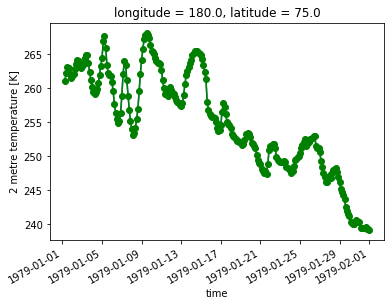

In [65]:
time_series = ds['t2m'].sel(time=slice('1979-01-01T06:00:00', '1979-02-01T00:00:00'), latitude=75.0, longitude=180.0)

register_matplotlib_converters()
time_series.plot()
time_series.plot.line(color='green', marker='o')

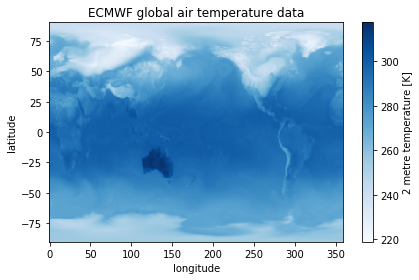

In [66]:
map_data = ds['t2m'].sel(time='1979-01-01T06:00:00')

map_data.plot(cmap=plt.cm.Blues)
plt.title('ECMWF global air temperature data')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.tight_layout()
plt.show()

#Australia has de highest temperature in January 1st of 1979

<font color=orange> The tools xarray uses for vizualing the data are based in the Matplotlib library, using syntax and function names from it whenever possible. </font>

## arithmetic and aggregation

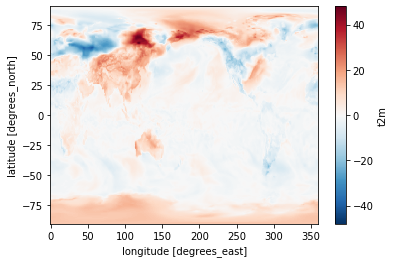

In [67]:
temperature1 = ds['t2m'].sel(time='1979-01-01T06:00:00')
temperature2 = ds['t2m'].isel(time=len(ds['t2m'])-1)
delta = temperature1 - temperature2
delta.plot()

In [70]:
wind_v10 = ds['v10'].sel(time='1979-01-02T06:00:00')
wind_u10 = ds['u10'].sel(time='1979-01-02T06:00:00')

windspeed = xr.ufuncs.sqrt(wind_v10**2+wind_u10**2)

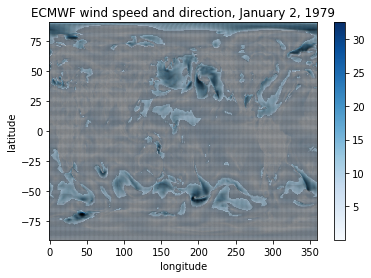

In [76]:
windspeed.plot(cmap=plt.cm.Blues)
plt.title('ECMWF wind speed and direction, January 2, 1979')
plt.ylabel('latitude')
plt.xlabel('longitude')
x = windspeed.coords['longitude'].values
y = windspeed.coords['latitude'].values
plt.quiver(x, y, wind_u10, wind_v10)

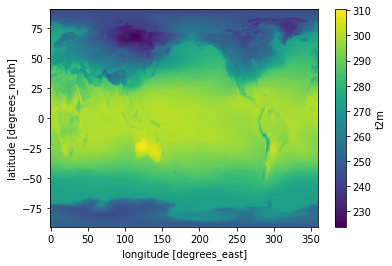

In [55]:
JF = ds['t2m'].sel(time=slice('1979-01-01T00:00:00','1979-02-01T00:00:00'))

JF.mean(dim='time').plot()
#We can see the average temperature in the January of 1979.

Text(0.5, 0, 'longitude')

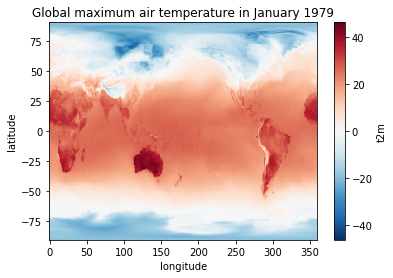

In [89]:
JF_celsius = JF-275.15
JF_celsius.max(dim='time').plot()
plt.title('Global maximum air temperature in January 1979')
plt.ylabel('latitude')
plt.xlabel('longitude')


Text(0.5, 0, 'time')

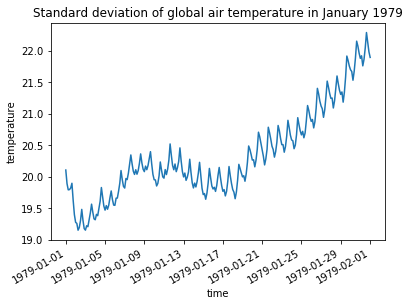

In [97]:
JF_celsius.std(dim=['latitude','longitude']).plot()

plt.title('Standard deviation of global air temperature in January 1979')
plt.ylabel('temperature')
plt.xlabel('time')


<font color=orange> Arithmetic operations are simply applying traditional operations (p.e.addition, subtraction, multiplication and division) that are automatically vectorized over all array values, as in numpy.

Xarray presents a range of statistical functions by reducin the DataArray’s data by applying aggregation methods along some dimension(s). </font>

## groupby processing

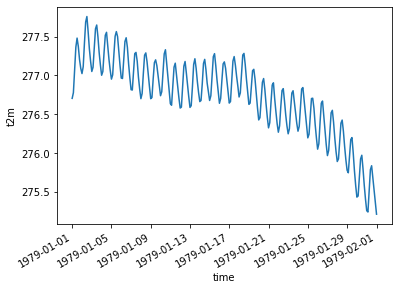

In [102]:
ds['t2m'].groupby('time').mean().plot()

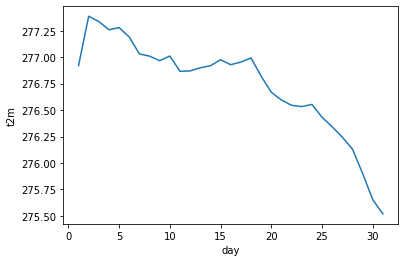

In [106]:
ds_by_day = ds['t2m'].groupby('time.day').mean()
ds_by_day.plot()

<font color=orange> Groupby processing is processing tool, similar to the well known GROUP BY processing used in SQL, that is used to implement the split-apply-combine strategy:
- Split your data into multiple independent groups.
- Apply some function to each group.
- Combine your groups back into a single data object.

It is especially used to group by a single one-dimensional variable or even a multi-dimensional variable. It is used especially to work with specific data group. </font>

## masking

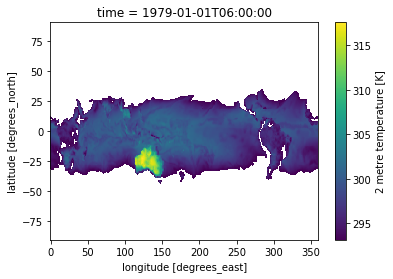

In [95]:
timeSeries = ds['t2m'].sel(time='1979-01-01T06:00:00')
condition = timeSeries > 293.15

timeSeries.where(condition).plot()

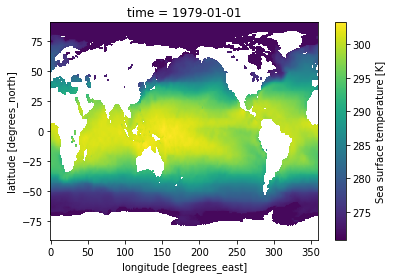

In [28]:
ds.sst.isel(time=0).plot()
#sst is Sea Surface Temperature

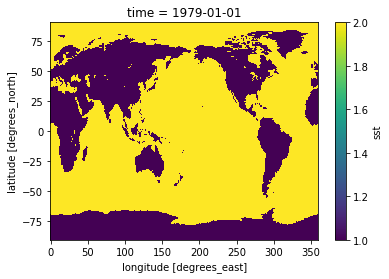

In [31]:
mask_ocean = 2 * np.ones((ds.dims['latitude'], ds.dims['longitude'])) * np.isfinite(ds.sst.isel(time=0))  
mask_land = 1 * np.ones((ds.dims['latitude'], ds.dims['longitude'])) * np.isnan(ds.sst.isel(time=0))  
mask_array = mask_ocean + mask_land
mask_array.plot()

In [32]:
ds.coords['mask'] = (('latitude', 'longitude'), mask_array)
# this can be useful to not repetly search for coordinates that are land or sea

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 249)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-02-01
    mask       (latitude, longitude) float64 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0
Data variables:
    sst        (time, latitude, longitude) float32 271.4601 ... 273.1602
    u10        (time, latitude, longitude) float32 -5.9714546 ... 2.8588574
    v10        (time, latitude, longitude) float32 5.250738 ... -2.5136685
    t2m        (time, latitude, longitude) float32 240.33821 ... 242.45421
Attributes:
    Conventions:  CF-1.6
    history:      2019-04-30 15:44:30 GMT by grib_to_netcdf-2.12.0: grib_to_n...

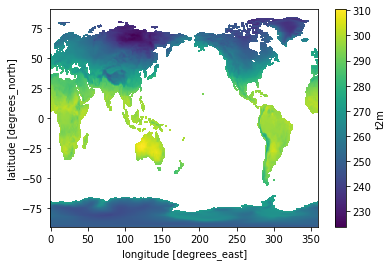

In [164]:
ds['t2m'].mean('time').where(ds.mask == 1).plot()

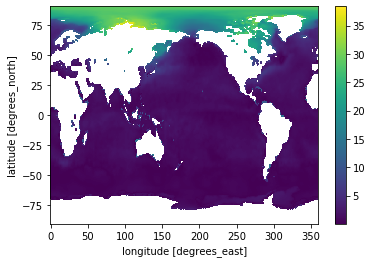

In [174]:
air_by_day = ds['t2m'].mean('time').where(ds.mask==2)

sea_by_day = ds['sst'].mean('time')
condition2 = sea_by_day.notnull()
sea_by_day = sea_by_day.where(condition)

t2m_range = abs(sea_by_day - air_by_day)
t2m_range.plot()


#Really confusing question. Did not understand what was supposed to answer.

<font color=orange> Masking is the process of only considering those cells that fall within the analysis mask in the operation. Setting an analysis mask means that processing will only occur on locations that fall within the mask, and all locations outside of it will be assigned to NoData in the output. It can be used by building manually a mask assigning cells to different index and adding as a DataArray coordinate. Once integrated it can be applied using the function where(). </font>

## Wrap-up

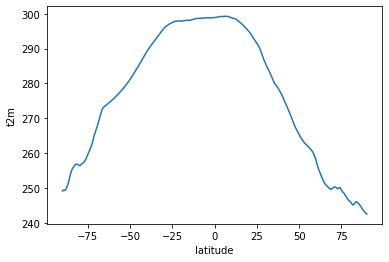

In [133]:
ds['t2m'].groupby('latitude').mean().plot()

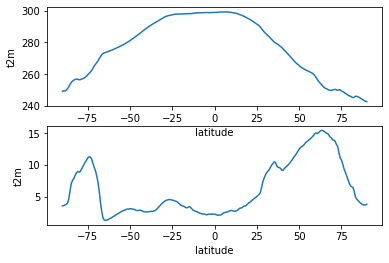

In [145]:
plt.subplot(2,1,2)
ds['t2m'].groupby('latitude').std().plot()
plt.subplot(2,1,1)
ds['t2m'].groupby('latitude').mean().plot()

#As comparing the variation of the average temperature and standar deviation at each latitude, we can see that when the std does
#not vary in consecutive latitudes, the gradient of the variation of mean is 0.

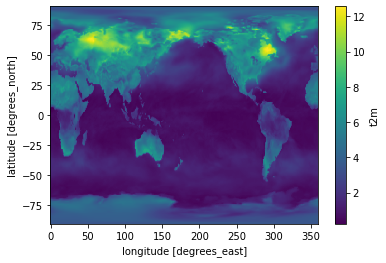

In [146]:
ds['t2m'].groupby('latitude').std('time').plot()
#In bigger latitudes, in specific locations, the range of temperature are much bigger, even though the temperatures are much
#lower.